In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
data=pd.read_csv('my_movies.csv')
data

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
data1=data.iloc[:,5:].copy()
#data1=data1.astype(bool)
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

data1 = data1.applymap(encode_units)
data1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


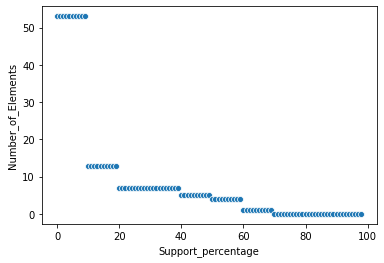

In [4]:
da=[]
for i in range(1,100,+1):
    i=i/100
    frequent_itemsets = apriori(data1, min_support= i,use_colnames=True)
    da.append(frequent_itemsets.shape[0])
da=pd.DataFrame(da)
da=da.reset_index()
da=da.rename({0:'Number_of_Elements','index':'Support_percentage'},axis=1)
sns.scatterplot(data=da,x='Support_percentage',y='Number_of_Elements')

#change support value to see changes in confidence/lift.

In [5]:
frequent_items= apriori(data1,min_support=0.2, use_colnames=True)
frequent_items

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Green Mile, Sixth Sense)"


In [6]:
dat=[]

for i in range(100,150,1):
    i=i/100
    rules1=association_rules(frequent_itemsets, metric='lift', min_threshold=i)
    dat.append(rules1.shape[0])
dat=pd.DataFrame(dat)
dat=dat.reset_index()
dat=dat.rename({'index':'Lift_ratio/100',0:'Number_of_elements'},axis=1)
sns.scatterplot(data=dat,x='Lift_ratio/100',y='Number_of_elements')
plt.title('Lift ratio vs Number of Elements at specified Support')
plt.show()

ValueError: cannot call `vectorize` on size 0 inputs unless `otypes` is set

In [ ]:
dat_C=[]
for i in range(1,100,1):
    i=i/100
    rules2= association_rules(frequent_itemsets, metric='confidence', min_threshold=i)
    dat_C.append(rules2.shape[0])
dat_C=pd.DataFrame(dat_C)
dat_C=dat_C.reset_index()
dat_C=dat_C.rename({'index':'Confidence_Percentage',0:'Number_of_elements'},axis=1)
sns.scatterplot(data=dat_C,x='Confidence_Percentage',y='Number_of_elements')
plt.title('Confidence ratio vs Number of Elements at specified Support')
plt.show()

In [ ]:
rules=association_rules(frequent_items, metric='lift',min_threshold=0.7)
rules=rules.reset_index()

In [ ]:
rules.sort_values('lift',ascending = False)[0:20]

In [ ]:
sns.scatterplot(data=rules,x='index',y='lift')

In [ ]:
sns.scatterplot(data=rules,x='index',y='confidence')